In [ ]:
import os

# List files in the /content/ directory
print(os.listdir('/content/'))


['.config', 'CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx', 'sample_data']


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Load the Excel file (Data Dictionary)
data_dict = pd.read_excel('/content/Data Dictionary - carprices.xlsx')

# Display the first few rows of each file to verify
print(df.head())
print(data_dict.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
# Dataset size
print("Dataset Size:", df.shape)

# Dataset information
df.info()


Dataset Size: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        20

In [ ]:
import pandas as pd

df = pd.read_csv('/content/CarPrice_Assignment.csv')
print(df.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Categorical columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [ ]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
print(df.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print(df.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
print(df.describe(include='all'))


            car_ID   symboling        CarName fueltype aspiration doornumber  \
count   205.000000  205.000000            205      205        205        205   
unique         NaN         NaN            147        2          2          2   
top            NaN         NaN  toyota corona      gas        std       four   
freq           NaN         NaN              6      185        168        115   
mean    103.000000    0.834146            NaN      NaN        NaN        NaN   
std      59.322565    1.245307            NaN      NaN        NaN        NaN   
min       1.000000   -2.000000            NaN      NaN        NaN        NaN   
25%      52.000000    0.000000            NaN      NaN        NaN        NaN   
50%     103.000000    1.000000            NaN      NaN        NaN        NaN   
75%     154.000000    2.000000            NaN      NaN        NaN        NaN   
max     205.000000    3.000000            NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocatio

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outlier_condition.any(axis=1)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (205, 26)
Shape after removing outliers: (139, 26)


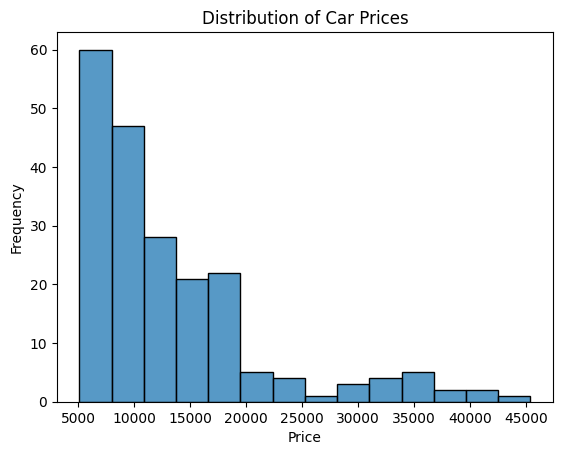

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'])
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


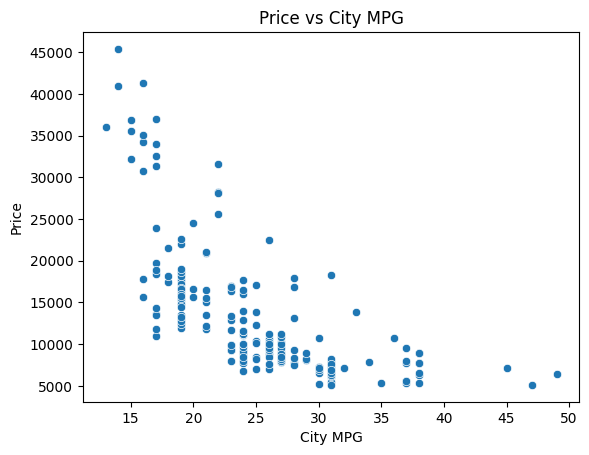

In [ ]:
sns.scatterplot(x='citympg', y='price', data=df)
plt.title('Price vs City MPG')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.show()


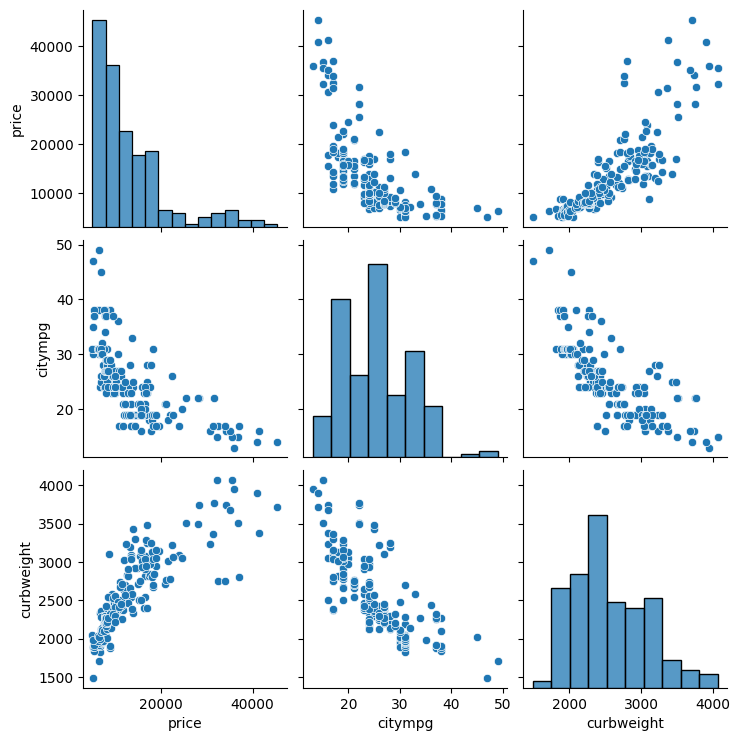

In [ ]:
sns.pairplot(df[['price', 'citympg', 'curbweight']])
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Drop the target column from the features and extract the target variable
X = df.drop('price', axis=1)
y = df['price']

# Convert categorical columns to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Print the shapes of X and y to verify dimensions
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first few rows of the feature matrix and target variable
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few rows of y:")
print(y.head())

# Print the column names of X to see the dummy variables
print("\nColumns in X:")
print(X.columns)


Shape of X: (205, 190)
Shape of y: (205,)

First few rows of X:
   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First few rows of scaled X:")
print(X_scaled[:5])


First few rows of scaled X:
[[-1.72362229  1.74347043 -1.6907718  -0.42652147 -0.84478235 -2.0204173
  -0.01456628  0.07444893  0.51907138 -1.83937734 -0.28834891  0.17448278
  -0.26296022 -0.64655303 -0.54605874 -0.070014   14.28285686 -0.070014
  -0.070014   -0.09925833 -0.070014   -0.070014   -0.070014   -0.070014
  -0.09925833 -0.070014   -0.09925833 -0.070014   -0.070014   -0.070014
  -0.070014   -0.070014   -0.070014   -0.070014   -0.070014   -0.070014
  -0.070014   -0.070014   -0.070014   -0.070014   -0.070014   -0.070014
  -0.070014   -0.070014   -0.070014   -0.070014   -0.070014   -0.070014
  -0.070014   -0.070014   -0.09925833 -0.070014   -0.070014   -0.12186667
  -0.070014   -0.070014   -0.070014   -0.09925833 -0.070014   -0.09925833
  -0.070014   -0.070014   -0.070014   -0.070014   -0.070014   -0.070014
  -0.070014   -0.12186667 -0.09925833 -0.070014   -0.070014   -0.070014
  -0.09925833 -0.09925833 -0.09925833 -0.070014   -0.070014   -0.12186667
  -0.070014   -0.070014   -

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (164, 190)
Shape of X_test: (41, 190)
Shape of y_train: (164,)
Shape of y_test: (41,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [ ]:
y_pred = model.predict(X_test)

print("First few predictions:")
print(y_pred[:5])


First few predictions:
[-8.29839460e+16 -2.36786700e+17  4.76818694e+16  9.74700000e+03
 -6.05296729e+16]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.652643426107536e+34
R^2 Score: -2.0934371060562355e+26


In [ ]:
print("Feature columns:", X.columns)


Feature columns: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=190)


In [ ]:
# Example random values
random_values = pd.DataFrame({
    'wheelbase': [2500],
    'carlength': [4500],
    'carwidth': [1800],
    'carheight': [1400],
    'curbweight': [3000],
    'enginesize': [160],
    'boreratio': [3.1],
    'stroke': [3.2],
    'compressionratio': [10.0],
    'horsepower': [120],
    'peakrpm': [5500],
    'citympg': [25],
    'highwaympg': [35]
})

# Encode and scale
random_values_encoded = pd.get_dummies(random_values, drop_first=True)
random_values_encoded = random_values_encoded.reindex(columns=X.columns, fill_value=0)
random_values_scaled = scaler.transform(random_values_encoded)
predicted_price = model.predict(random_values_scaled)

print("Predicted Price:", predicted_price)


Predicted Price: [7.87052857e+15]
